## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 2.72075738, -0.31039039],
       [ 0.23715285,  1.10679911],
       [-0.66350852, -0.53688108],
       ...,
       [-2.21282587,  0.31531333],
       [-1.55699437,  0.13673358],
       [-0.94057828, -0.22081937]])

In [6]:
y

array([ 1.39854033e+02,  5.59944921e+01, -6.18390752e+01,  1.70700909e+01,
        6.76571180e+01, -6.74408431e+01,  1.44532337e+02,  3.14924510e+01,
        5.31196003e+01, -2.10445987e+02,  1.86309457e+02, -9.47585983e+00,
       -8.05590927e+01,  5.28489302e+01, -6.87324344e+01, -2.66909115e+01,
        6.42664837e+00, -4.91213898e+01,  2.11044869e+01,  3.55644517e+00,
        6.85702363e+00, -6.89695225e+01, -3.40419159e+01, -5.04998304e+01,
        2.44380904e+00,  5.20580791e+01,  1.32113922e+02, -1.89808129e+02,
        3.91760246e+01, -1.91835325e+01, -2.14151588e+01, -1.56704771e+02,
       -7.14392553e+01,  7.15139686e+01, -3.31578996e+01,  4.04380841e+00,
       -4.83300604e+00, -3.16760423e+01, -3.79410476e+00,  1.73180791e+01,
        7.19465765e+01, -5.19745630e+01,  9.40227993e+01,  3.03452479e+01,
        5.64342417e+00,  3.98944761e+01,  1.44448635e+02,  7.14348293e+00,
        4.93987192e+01, -8.73653678e+01,  1.61728807e+02,  6.63336072e+01,
       -8.27773271e+01, -

In [7]:
pd.DataFrame(X)[0]

0      2.720757
1      0.237153
2     -0.663509
3      0.028846
4      0.569587
         ...   
995   -0.245038
996   -0.980799
997   -2.212826
998   -1.556994
999   -0.940578
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

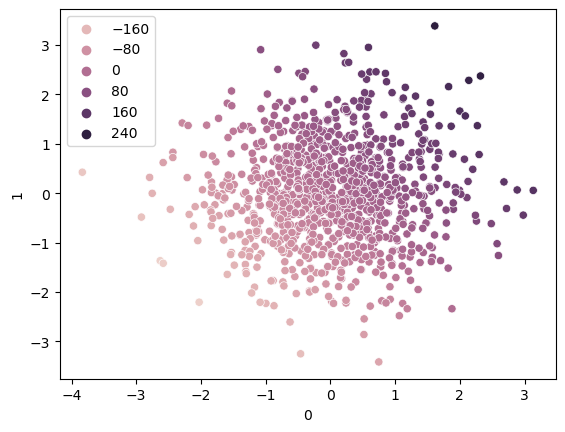

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[54.47142995, 45.8068111 ]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([  -7.48315691,   31.13136978,  -16.67947321,   37.00554033,
        -64.29512089,   69.76423056,  -52.81711616,   23.1676352 ,
         -9.20260656,  -61.75668444, -153.53951929, -174.1662363 ,
         67.5481374 ,    8.60953777,  105.66525337,   39.73029552,
         50.36983897,  -13.55503974,   41.45985834, -156.60687958,
        -69.30496971,  -44.46514096,   15.89272596,   30.01181265,
       -114.72802725,    7.70377492,   -2.51896994,   55.89901375,
        -54.59295311,  122.42359523,  -42.56988185,  145.43969596,
         53.15525581,  106.41349099,  -32.46416757,  156.33929954,
        -39.43391871,  -47.29239043,   -2.8673656 ,  -21.42528364,
        -44.37117904,   20.01178775,   52.23773052,  -51.76854943,
         -0.84527056,  -24.86908861,    7.3548945 ,  -81.62819938,
         -2.75500684,  185.02105806, -189.47231613,   55.27295587,
        -61.11695636,   -1.9285462 ,  -63.870008  ,   -2.63479849,
         28.10303401,   52.5830957 ,   66.93825855,  -31.27423

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9979237917933305


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid, scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-514.349 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-650.152 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-527.056 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-776.655 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-704.155 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-514.349 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-650.152 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-527.056 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-776.655 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-704.155 total time=   0.0s
[CV 1/5]

[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=-8.954 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=-9.614 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=-9.260 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=-8.709 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=-10.808 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.954 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.614 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.260 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.709 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-10.808 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=-8.948 tota

[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-8.157 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-10.503 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-8.580 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-9.555 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-9.413 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-8.157 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-10.503 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=-8.580 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=-9.555 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=-9.413 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=-8.157 tot

[CV 3/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-9.431 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-8.133 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-10.483 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-8.600 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-9.556 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-9.415 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-8.103 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-10.507 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=-8.600 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=-9.556 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=-9.415 total 

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9991560503529233
